In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
sample_result = pd.read_csv("./sample_submission.csv")

In [3]:
sample_result['added_products'].unique()

array(['ind_tjcr_fin_ult1'], dtype=object)

In [ ]:
train_df = pd.read_csv("./train_ver2.csv")
test_df = pd.read_csv("./test_ver2.csv")

In [ ]:
column_map_dict = {'fecha_dato': 'date', 
                   'ncodpers': 'customer_code', 
                   'ind_empleado': 'employee_index', # A active, B ex employed, F filial, N not employee, P pasive 
                   'pais_residencia': 'country', 
                   'sexo': 'sex',
                   'age': 'age',
                   'fecha_alta': 'first_holder_date', 
                   'ind_nuevo': 'new_customer_index', 
                   'antiguedad': 'customer_seniority', 
                   'indrel': 'primary_index',
                   'ult_fec_cli_1t': 'primary_last_date', 
                   'indrel_1mes': 'customer_type', # 1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
                   'tiprel_1mes': 'customer_relation_type', # A (active), I (inactive), P (former customer),R (Potential)
                   'indresi': 'residence_index', 
                   'indext': 'foreigner_index',
                   'conyuemp': 'spouse_index', 
                   'canal_entrada': 'channel', 
                   'indfall': 'deceased_index', 
                   'tipodom': 'addres_type', 
                   'cod_prov': 'province_code',
                   'nomprov': 'province_name', 
                   'ind_actividad_cliente': 'activity_index', # 1, active customer; 0, inactive custome 
                   'renta': 'household_gross_income', 
                   'segmento': 'segmentation', #01 - VIP, 02 - Individuals 03 - college graduated
                   'ind_ahor_fin_ult1': 'saving_account',
                   'ind_aval_fin_ult1': 'guarantees', 
                   'ind_cco_fin_ult1': 'current_accounts',
                   'ind_cder_fin_ult1': 'derivada_account', 
                   'ind_cno_fin_ult1': 'payroll_account', 
                   'ind_ctju_fin_ult1': 'junior_account',
                   'ind_ctma_fin_ult1': 'mas_particular_account', 
                   'ind_ctop_fin_ult1': 'particular_account', 
                   'ind_ctpp_fin_ult1': 'particular_plus_account',
                   'ind_deco_fin_ult1': 'short_term_deposit', 
                   'ind_deme_fin_ult1': 'medium_term_deposit', 
                   'ind_dela_fin_ult1': 'long_term_deposit',
                   'ind_ecue_fin_ult1': 'e_account', 
                   'ind_fond_fin_ult1': 'funds', 
                   'ind_hip_fin_ult1': 'mortgage',
                   'ind_plan_fin_ult1': 'pensions', 
                   'ind_pres_fin_ult1': 'loans', 
                   'ind_reca_fin_ult1': 'taxes',
                   'ind_tjcr_fin_ult1': 'credit_card', 
                   'ind_valo_fin_ult1': 'securities', 
                   'ind_viv_fin_ult1': 'home_account',
                   'ind_nomina_ult1': 'payroll', 
                   'ind_nom_pens_ult1': 'pensions_2', 
                   'ind_recibo_ult1': 'direct_debit'}



In [ ]:
train_df.rename(columns=column_map_dict, inplace=True)
test_df.rename(columns=column_map_dict, inplace=True)
train_df_copied = train_df.copy()
train_product_df = train_df_copied.drop(list(test_df.columns), axis=1)
train_df = train_df_copied[list(test_df.columns)]

In [43]:
categorical_cols = ['employee_index', 'country', 'sex', 'new_customer_index', 'primary_index', 
                    'customer_type', 'customer_relation_type', 'residence_index', 'foreigner_index', 
                   'spouse_index', 'channel', 'deceased_index', 'addres_type', 'province_code', 
                   'province_name', 'activity_index', 'segmentation']





In [52]:
for col in categorical_cols:
    train_df[col], _ = train_df[col].factorize(na_sentinel=-99)

/var/folders/n3/2_y2z9ns7js3zfs6xp0ls65m0000gn/T/ipykernel_8931/3430375200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col], _ = train_df[col].factorize(na_sentinel=-99)


In [54]:
train_df.head()

,date,customer_code,employee_index,country,sex,age,first_holder_date,new_customer_index,customer_seniority,primary_index,...,foreigner_index,spouse_index,channel,deceased_index,addres_type,province_code,province_name,activity_index,household_gross_income,segmentation
0,2015-01-28,1375586,0,0,0,35,2015-01-12,0,6,0,...,0,-99,0,0,0,0,0,0,87218.10,0
1,2015-01-28,1050611,0,0,1,23,2012-08-10,0,35,0,...,1,-99,1,0,0,1,1,1,35548.74,1
2,2015-01-28,1050612,0,0,1,23,2012-08-10,0,35,0,...,0,-99,1,0,0,1,1,1,122179.11,1
3,2015-01-28,1050613,0,0,0,22,2012-08-10,0,35,0,...,0,-99,2,0,0,2,2,1,119775.54,1
4,2015-01-28,1050614,0,0,1,23,2012-08-10,0,35,0,...,0,-99,1,0,0,2,2,0,NaN,1


In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   date                    object 
 1   customer_code           int64  
 2   employee_index          int64  
 3   country                 int64  
 4   sex                     int64  
 5   age                     object 
 6   first_holder_date       object 
 7   new_customer_index      int64  
 8   customer_seniority      object 
 9   primary_index           int64  
 10  primary_last_date       object 
 11  customer_type           int64  
 12  customer_relation_type  int64  
 13  residence_index         int64  
 14  foreigner_index         int64  
 15  spouse_index            int64  
 16  channel                 int64  
 17  deceased_index          int64  
 18  addres_type             int64  
 19  province_code           int64  
 20  province_name           int64  
 21  activity_index          int64

In [ ]:
train_df['date'].apply(lambda x: x)

In [ ]:
df.apply(lambda x: [1, 2], axis=1, result_type='expand')

In [72]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d')
train_df['first_holder_date'] = pd.to_datetime(train_df['first_holder_date'].astype(int), format='%Y-%m-%d')

/var/folders/n3/2_y2z9ns7js3zfs6xp0ls65m0000gn/T/ipykernel_8931/1316836674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d')
/var/folders/n3/2_y2z9ns7js3zfs6xp0ls65m0000gn/T/ipykernel_8931/1316836674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['first_holder_date'] = pd.to_datetime(train_df['first_holder_date'].astype(int), format='%Y-%m-%d')


In [ ]:
def convert_to_monthly_time():
    

In [124]:
train_df['time_monthly'] = monthly_time_column

/var/folders/n3/2_y2z9ns7js3zfs6xp0ls65m0000gn/T/ipykernel_8931/4072739920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['time_monthly'] = monthly_time_column


In [125]:
train_df


,date,customer_code,employee_index,country,sex,age,first_holder_date,new_customer_index,customer_seniority,primary_index,...,spouse_index,channel,deceased_index,addres_type,province_code,province_name,activity_index,household_gross_income,segmentation,time_monthly
0,2015-01-28,1375586,0,0,0,35,2015-01-12,0,6,0,...,-99,0,0,0,0,0,0,87218.10,0,1
1,2015-01-28,1050611,0,0,1,23,2012-08-10,0,35,0,...,-99,1,0,0,1,1,1,35548.74,1,1
2,2015-01-28,1050612,0,0,1,23,2012-08-10,0,35,0,...,-99,1,0,0,1,1,1,122179.11,1,1
3,2015-01-28,1050613,0,0,0,22,2012-08-10,0,35,0,...,-99,2,0,0,2,2,1,119775.54,1,1
4,2015-01-28,1050614,0,0,1,23,2012-08-10,0,35,0,...,-99,1,0,0,2,2,0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,0,0,1,22,2013-08-14,0,33,0,...,-99,1,0,0,2,2,1,43912.17,1,17
13647305,2016-05-28,1166764,0,0,1,23,2013-08-14,0,33,0,...,-99,1,0,0,34,34,1,23334.99,1,17
13647306,2016-05-28,1166763,0,0,0,47,2013-08-14,0,33,0,...,-99,1,0,0,2,2,0,NaN,0,17
13647307,2016-05-28,1166789,0,0,0,22,2013-08-14,0,33,0,...,-99,1,0,0,2,2,1,199592.82,1,17


In [122]:
monthly_time_column = (train_df['date'].dt.year-2015) *12 + train_df['date'].dt.month

In [123]:
monthly_time_column

0            1
1            1
2            1
3            1
4            1
            ..
13647304    17
13647305    17
13647306    17
13647307    17
13647308    17
Name: date, Length: 13647309, dtype: int64

In [112]:
a = train_df['first_holder_date'].dt.year

In [114]:
year_count = []
for year in (a).unique():
    #print(year)
    bool_series = train_df['first_holder_date'].dt.year == year
    #print(bool_series.sum())
    #print()
    year_count.append(bool_series.sum())
    
year_count = np.array(year_count)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

<BarContainer object of 23 artists>

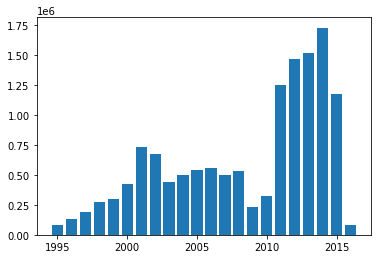

In [111]:
import matplotlib.pyplot as plt
plt.bar((train_df['first_holder_date'].dt.year).unique(), year_count, tick_label=ye)
#plt.xticks((train_df['first_holder_date'].dt.year).unique())

In [141]:
train_df['household_gross_income'] = train_df['household_gross_income'].fillna( -999)

/var/folders/n3/2_y2z9ns7js3zfs6xp0ls65m0000gn/T/ipykernel_8931/3835062655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['household_gross_income'] = train_df['household_gross_income'].fillna( -999)


In [143]:
gross_income_array = np.array(train_df['household_gross_income'])

In [144]:
gross_income_array.min(), gross_income_array.max()


(-999.0, 28894395.51)

(array([2.07600e+03, 3.42220e+04, 1.40971e+05, 3.57686e+05, 6.14861e+05,
        7.94648e+05, 8.86368e+05, 8.87578e+05, 8.31389e+05, 7.49121e+05,
        6.77165e+05, 5.89385e+05, 5.33212e+05, 4.45309e+05, 3.86148e+05,
        3.38018e+05, 2.90547e+05, 2.67676e+05, 2.30823e+05, 1.94012e+05,
        1.71765e+05, 1.52093e+05, 1.36076e+05, 1.16631e+05, 9.83650e+04,
        8.60610e+04, 7.30520e+04, 6.73700e+04, 5.85010e+04, 5.43700e+04,
        4.48120e+04, 4.42760e+04, 3.90450e+04, 3.46920e+04, 2.96080e+04,
        2.75960e+04, 2.74400e+04, 2.23790e+04, 2.09600e+04, 2.12890e+04,
        1.92300e+04, 1.53170e+04, 1.66210e+04, 1.49090e+04, 1.28850e+04,
        1.67420e+04, 1.27240e+04, 9.24500e+03, 9.39800e+03, 8.08800e+03,
        7.01200e+03, 6.64200e+03, 5.03300e+03, 5.57700e+03, 5.41100e+03,
        5.05800e+03, 4.01200e+03, 4.24500e+03, 3.95900e+03, 3.41400e+03,
        3.02800e+03, 3.45500e+03, 3.29500e+03, 2.48100e+03, 2.94100e+03,
        2.57500e+03, 3.01600e+03, 2.23500e+03, 1.96

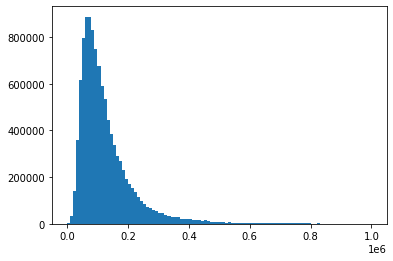

In [157]:
import matplotlib.pyplot as plt
plt.hist(gross_income_array, range=(0, 1e+6), bins=100)

In [158]:
gross_income_array

array([ 87218.1 ,  35548.74, 122179.11, ...,   -999.  , 199592.82,
         -999.  ])

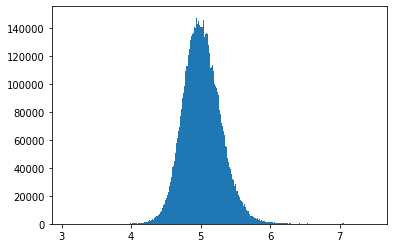

In [166]:
_, _,a = plt.hist(np.log10(gross_income_array[gross_income_array>0.01]), bins=500)

In [170]:
train_df["date"].unique().shape

(17,)

In [93]:
a = train_df['first_holder_date'].dt.year == 2015.

In [101]:
type(a)

pandas.core.series.Series

In [98]:
a.sum()

1171820

In [31]:
for col in train_df.columns:
    print(col)
    print()
    print(train_df[col].unique())
    print()
    

date
['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']

customer_code
[1375586 1050611 1050612 ... 1173729 1164094 1550586]

employee_index
['N' nan 'A' 'B' 'F' 'S']

country
['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN'
 'GW' 'OM' 'CG' 'LV' 'LT' 'ML' 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD'
 'BZ' 'ZW' 'DJ' 'JM' 'BM' 'MT']

sex
['H' 'V' nan]

age
[' 35' ' 23' ' 22' ' 

['A' 'I' nan 'P' 'R' 'N']

residence_index
['S' nan 'N']

foreigner_index
['N' 'S' nan]

spouse_index
[nan 'N' 'S']

channel
['KHL' 'KHE' 'KHD' 'KFA' 'KFC' 'KAT' nan 'KAZ' 'RED' 'KHC' 'KHK' 'KGN'
 'KHM' 'KHO' 'KDH' 'KEH' 'KAD' 'KBG' 'KGC' 'KHF' 'KFK' 'KHN' 'KHA' 'KAF'
 'KGX' 'KFD' 'KAG' 'KFG' 'KAB' 'KCC' 'KAE' 'KAH' 'KAR' 'KFJ' 'KFL' 'KAI'
 'KFU' 'KAQ' 'KFS' 'KAA' 'KFP' 'KAJ' 'KFN' 'KGV' 'KGY' 'KFF' 'KAP' 'KDE'
 'KFV' '013' 'K00' 'KAK' 'KCK' 'KCL' 'KAY' 'KBU' 'KDR' 'KAC' 'KDT' 'KCG'
 'KDO' 'KDY' 'KBQ' 'KDA' 'KBO' 'KCI' 'KEC' 'KBZ' 'KES' 'KDX' 'KAS' '007'
 'KEU' 'KCA' 'KAL' 'KDC' 'KAW' 'KCS' 'KCB' 'KDU' 'KDQ' 'KCN' 'KCM' '004'
 'KCH' 'KCD' 'KCE' 'KEV' 'KBL' 'KEA' 'KBH' 'KDV' 'KFT' 'KEY' 'KAO' 'KEJ'
 'KEO' 'KEI' 'KEW' 'KDZ' 'KBV' 'KBR' 'KBF' 'KDP' 'KCO' 'KCF' 'KCV' 'KAM'
 'KEZ' 'KBD' 'KAN' 'KBY' 'KCT' 'KDD' 'KBW' 'KCU' 'KBX' 'KDB' 'KBS' 'KBE'
 'KCX' 'KBP' 'KBN' 'KEB' 'KDS' 'KEL' 'KDG' 'KDF' 'KEF' 'KCP' 'KDM' 'KBB'
 'KDW' 'KBJ' 'KFI' 'KBM' 'KEG' 'KEN' 'KEQ' 'KAV' 'KFH' 'KFM' 'KAU' 'KED'
 

In [179]:
for col in ['payroll', 'pensions_2']:
    train_product_df[col], _ = train_product_df[col].factorize(na_sentinel=-99)
    #train_product_df['payroll'].unique()

In [183]:
train_df.columns

Index(['date', 'customer_code', 'employee_index', 'country', 'sex', 'age',
       'first_holder_date', 'new_customer_index', 'customer_seniority',
       'primary_index', 'primary_last_date', 'customer_type',
       'customer_relation_type', 'residence_index', 'foreigner_index',
       'spouse_index', 'channel', 'deceased_index', 'addres_type',
       'province_code', 'province_name', 'activity_index',
       'household_gross_income', 'segmentation', 'time_monthly'],
      dtype='object')

In [185]:
train_product_df.head()

,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposit,...,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit,time_monthly
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [184]:
train_product_df['time_monthly'] = train_df['time_monthly']

In [182]:
for col in train_product_df.columns:
    if (col=='time_monthly'):
        break
        
    
    train_product[col + '_prev'] = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 24 columns):
 #   Column                   Dtype
---  ------                   -----
 0   saving_account           int64
 1   guarantees               int64
 2   current_accounts         int64
 3   derivada_account         int64
 4   payroll_account          int64
 5   junior_account           int64
 6   mas_particular_account   int64
 7   particular_account       int64
 8   particular_plus_account  int64
 9   short_term_deposit       int64
 10  medium_term_deposit      int64
 11  long_term_deposit        int64
 12  e_account                int64
 13  funds                    int64
 14  mortgage                 int64
 15  pensions                 int64
 16  loans                    int64
 17  taxes                    int64
 18  credit_card              int64
 19  securities               int64
 20  home_account             int64
 21  payroll                  int64
 22  pensions_2      

In [37]:
train_df.count()

date                      13647309
customer_code             13647309
employee_index            13619575
country                   13619575
sex                       13619505
age                       13647309
first_holder_date         13619575
new_customer_index        13619575
customer_seniority        13647309
primary_index             13619575
primary_last_date            24793
customer_type             13497528
customer_relation_type    13497528
residence_index           13619575
foreigner_index           13619575
spouse_index                  1808
channel                   13461183
deceased_index            13619575
addres_type               13619574
province_code             13553718
province_name             13553718
activity_index            13619575
household_gross_income    10852934
segmentation              13457941
dtype: int64